**BÀI PHÂN TÍCH doanh số NHÀ HÀNG PIZZA**
<br> **Mục tiêu phân tích**
<br>Đưa ra khuyến nghị với stakeholders về phương án tăng doanh số dựa trên việc tối ưu các hoạt động hiện có, chưa cần phải đầu tư thêm nhiều.


# PHẦN 1: SETUP

In [1]:
# import libary
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Portfolio/Restaurant_Pizza_Analytics

Mounted at /content/drive
/content/drive/MyDrive/Portfolio/Restaurant_Pizza_Analytics


In [2]:
# loading file
res_trans = pd.read_excel("data/raw/restaurantPizza_transaction.xlsx")

In [3]:
# let's take a look at dataset
print('\033[1m', "I. DATASET INFORMATION\n", '\033[0m')
print(res_trans.info())
print('\033[1m', "\nII. TAKE A LOOK AT SAMPLE\n", '\033[0m', res_trans.head())
print('\033[1m', "\nIII. SHORT DESCRIBE DATASET\n", '\033[0m', res_trans.describe())

 I. DATASET INFORMATION
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB
None
 
II. TAK

# PHẦN 2: PHÂN TÍCH
Table of contents
<br>Chúng ta có thể phân tích dưới 2 góc nhìn: Sản phẩm (product) và Thời gian (time)
<br>(Chúng ta sẽ bắt đầu với góc nhìn product)

##**PHẦN 2.1 | point of view: PRODUCT**
<br> Dưới đây là một số câu hỏi chúng ta có thể phân tích

<br> **I. DOANH SỐ**
<br> **1.1. Những sản phẩm nào chiếm 80% doanh số?**
<br> (Kỳ vọng: Khoảng 20% sản phẩm chiếm 80% doanh số -> chứng tỏ danh mục sản phẩm đang được cơ cấu rõ ràng)
<br> **1.2. Những sản phẩm nào chiếm 20% doanh số?**
<br> (Kỳ vọng: Khoảng 80% sản phẩm chiếm 20% doanh số -> chứng tỏ danh mục sản phẩm đang được cơ cấu rõ ràng)
<br> **MỤC TIÊU**
<br> - Chúng ta sẽ có danh sách các sản phẩm bán tốt để tập trung bán.
<br> - Chúng ta cũng sẽ có danh sách các sản phẩm bán chưa tốt để ra các quyết định cần thiết.
<br> **1.3. Những sản phẩm nào chiếm 80% lượt order?**
<br> (Kỳ vọng: Khoảng 20% sản phẩm chiếm 80% lượt order)
<br> **1.4. Những sản phẩm nào chiếm 20% lượt order?**
<br> (Kỳ vọng: Khoảng 80% sản phẩm chiếm 20% lượt order)
<br> **MỤC TIÊU**
<br> - Mục tiêu lớn nhất là để xác nhận lại kết quả phân tích doanh số (phần I), xem có trùng khớp không?
<br>(vì danh sách sản phẩm chỉ có pizza nên không lo có các sản phẩm giá thấp nhưng có lượt order nhiều gây nhiễu, ví dụ như kem, khăn ướt,...)

<br> **II. ĐẶC ĐIỂM CHUNG CỦA NHÓM SẢN PHẨM**
<br> **1.1. Đặc điểm chung của nhóm sản phẩm chiếm 80% doanh số là gì?**
<br> (Kỳ vọng: Các sản phẩm đều chứa nguyên liệu phô mai)
<br> **1.2. Đặc điểm chung của nhóm sản phẩm chiếm 20% doanh số là gì?**
<br> (Kỳ vọng: Các sản phẩm đều chứa nguyên liệu xúc xích)
<br> **MỤC TIÊU**
<br> - Chúng ta có thể nghiên cứu tìm ra đặc điểm chung giữa các sản phẩm doanh số cao để nghiên cứu ra các sản phẩm tương tự mang các đặc điểm đó.
<br> - Chúng ta có thể nghiên cứu tìm ra đặc điểm chung giữa các sản phẩm doanh số thấp để tránh các đặc điểm đó cho các sản phẩm tương lai.

<br> **III. PHÂN TÍCH SIZE SẢN PHẨM**
<br> **1.1. Size sản phẩm nào được order nhiều nhất**
<br> (Giả thiết: Các size S, M, L sẽ chiếm đa số (>80%))
<br> **1.2. Sản phẩm nào thường được order cùng size sản phẩm nào?**
<br> **MỤC TIÊU**
- **Short-term**
<br>Tìm xem size sản phẩm nào đang được order nhiều, xem có điều gì bất thường không?
<br> -> Nếu data thực tế khác giả thuyết của chúng ta, chúng ta cần tìm hiểu nguyên nhân tại sao)
- **Long-term**
<br>Tìm ra sản phẩm A thường được order với size X nào? Từ đó, ngành hàng có thể tối ưu chiến lược giá và tối ưu thiết kế menu.

###**I. DOANH SỐ**

In [4]:
# Có tổng cộng bao nhiêu unique product đang phát sinh doanh số
countOfUniqueProducts = res_trans['pizza_name'].nunique()
# summary top pizza name by total revenue
top_prod_rev = res_trans.groupby(['pizza_name'])['total_price'].sum().sort_values(ascending=False).reset_index()

####**1.1. Những sản phẩm nào chiếm 80% doanh số?**
<br> (Kỳ vọng: Khoảng 20% sản phẩm chiếm 80% doanh số)

In [5]:
# TÌM DANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% doanh số

# Sort DataFrame by revenue in descending order
df_sorted = top_prod_rev.sort_values(by='total_price', ascending=False).reset_index(drop=True)
# Calculate cumulative sum of revenue
df_sorted['cumulative_sum'] = df_sorted['total_price'].cumsum()
# Find the index where cumulative sum exceeds or equals 80% of total revenue
index_80_percent = (df_sorted['cumulative_sum'] >= 0.8 * df_sorted['total_price'].sum()).idxmax()
top_rev_80 = df_sorted[['pizza_name', 'total_price']].iloc[:index_80_percent+1]
top_rev_80.columns = ['pizza_name', 'total_revenue']

print('Thực tế: ', '\033[1m', (index_80_percent+1) / countOfUniqueProducts * 100, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP 80% doanh số.')
print('Kỳ vọng: ', '\033[1m', 20, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP 80% doanh số.')
print('\033[1m', '\nDANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% DOANH THU\n', '\033[0m', top_rev_80)

Thực tế:   68.75 %  sản phẩm pizza khác nhau ĐÓNG GÓP 80% doanh số.
Kỳ vọng:   20 %  sản phẩm pizza khác nhau ĐÓNG GÓP 80% doanh số.
 
DANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% DOANH THU
                                      pizza_name  total_revenue
0                       The Thai Chicken Pizza       43434.25
1                   The Barbecue Chicken Pizza       42768.00
2                 The California Chicken Pizza       41409.50
3                     The Classic Deluxe Pizza       38180.50
4                      The Spicy Italian Pizza       34831.25
5                  The Southwest Chicken Pizza       34705.75
6                    The Italian Supreme Pizza       33476.75
7                           The Hawaiian Pizza       32273.25
8                        The Four Cheese Pizza       32265.70
9                           The Sicilian Pizza       30940.50
10                         The Pepperoni Pizza       30161.75
11                             The Greek Pizza       28454.10
12             

####**1.2. Những sản phẩm nào chiếm 20% doanh số?**
<br>(Kỳ vọng: Khoảng 80% sản phẩm chiếm 20% doanh số)

In [6]:
# TÌM DANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% doanh số
# Sort DataFrame by revenue in descending order
df_sorted = top_prod_rev.sort_values(by='total_price', ascending=True).reset_index(drop=True)
# Calculate cumulative sum of revenue
df_sorted['cumulative_sum'] = df_sorted['total_price'].cumsum()

# Find the index where cumulative sum exceeds or equals 20% of total revenue
index_20_percent = (df_sorted['cumulative_sum'] >= 0.2 * df_sorted['total_price'].sum()).idxmax()
bot_rev_20 = df_sorted[['pizza_name', 'total_price']].iloc[:index_20_percent+1]
bot_rev_20 = df_sorted.iloc[0:index_20_percent+1]
bot_rev_20.columns = ['pizza_name', 'total_revenue', 'cumulative_sum']

print('Thực tế: ', '\033[1m', (index_20_percent+1) / countOfUniqueProducts * 100, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '20% doanh số.', '\033[0m')
print('Kỳ vọng: ', '\033[1m', 80, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '20% doanh số.', '\033[0m')
print('\033[1m', '\nDANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% DOANH THU\n', '\033[0m', bot_rev_20[['pizza_name', 'total_revenue']])

Thực tế:   34.375 %  sản phẩm pizza khác nhau ĐÓNG GÓP  20% doanh số. 
Kỳ vọng:   80 %  sản phẩm pizza khác nhau ĐÓNG GÓP  20% doanh số. 
 
DANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% DOANH THU
                                      pizza_name  total_revenue
0                         The Brie Carre Pizza       11588.50
1                       The Green Garden Pizza       13955.75
2                    The Spinach Supreme Pizza       15277.75
3                      The Mediterranean Pizza       15360.50
4                      The Spinach Pesto Pizza       15596.00
5                          The Calabrese Pizza       15934.25
6                 The Italian Vegetables Pizza       16019.25
7                        The Soppressata Pizza       16425.75
8                      The Chicken Pesto Pizza       16701.75
9                    The Chicken Alfredo Pizza       16900.25
10  The Pepperoni, Mushroom, and Peppers Pizza       18834.50


**NHẬN XÉT**
<br>Kỳ vọng 20% products đóng góp 80% doanh số nhưng thực tế đến 68.75% sản phẩm ứng với 80% doanh số.
<br>-> **Chưa tìm thấy sản phẩm có doanh số áp đảo.**

Kỳ vọng tìm ra được 80% products đóng góp 20% doanh số nhưng thực tế chỉ có 34.38% products ứng với 20% doanh số.
<br>-> **Các sản phẩm với ý nghĩa làm đa dạng menu đang chiếm nhiều % doanh số hơn dự kiến.**
<br>Vậy:
- Phải chăng menu đang thiếu sản phẩm chủ lực để thu hút khách hàng cũng như tạo doanh số chính cho nhà hàng.
- Phải chăng menu đang có quá nhiều sản phẩm khiến khách hàng bối rối khi chọn món; khiến vận hành bếp phức tạp.

**SUGGEST**
- Dựa trên danh sách các sản phẩm đóng góp 80% doanh số. Chọn ra 4 sản phẩm pizza chủ lực, đây sẽ là nhóm sản phẩm signature của nhà hàng, thu hút khách hàng và tạo doanh số chính cho nhà hàng.
- Trong danh sách các sản phẩm đóng góp 20% doanh số, cân nhắc cắt giảm từ từ các sản phẩm doanh số kém để tối ưu vận hành bếp, chuỗi cung ứng (có thể bắt đầu cắt giảm trước 10% ~ tương đương 4 sản phẩm)

####**1.3. Những sản phẩm nào chiếm 80% lượt order?**
<br>(Kỳ vọng: Khoảng 20% sản phẩm chiếm 80% lượt order)

In [7]:
# TÌM DANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% LƯỢT ORDER
# Tạo dataframe count of order
top_prod_order = res_trans.groupby(by=['pizza_name'])['pizza_id'].count().reset_index().sort_values(by='pizza_id', ascending=True).reset_index(drop=True)
top_prod_order.columns = ['pizza_name', 'countOfPizzaOrder']
# Sort DataFrame in descending order
df_sorted = top_prod_order.sort_values(by='countOfPizzaOrder', ascending=False).reset_index(drop=True)
# Calculate cumulative sum of revenue
df_sorted['cumulative_sum'] = df_sorted['countOfPizzaOrder'].cumsum()
# Find the index where cumulative sum exceeds or equals 80% of number of order
index_80_percent = (df_sorted['cumulative_sum'] >= 0.8* df_sorted['countOfPizzaOrder'].sum()).idxmax()
top_order_80 = df_sorted[['pizza_name', 'countOfPizzaOrder']].iloc[:index_80_percent+1]

print('Thực tế: ', '\033[1m', (index_80_percent+1) / countOfUniqueProducts * 100, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '80% lượt order.', '\033[0m')
print('Kỳ vọng: ', '\033[1m', 20, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '80% lượt order.', '\033[0m')
print('\033[1m', '\nDANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% LƯỢT ORDER\n', '\033[0m', top_order_80)

Thực tế:   68.75 %  sản phẩm pizza khác nhau ĐÓNG GÓP  80% lượt order. 
Kỳ vọng:   20 %  sản phẩm pizza khác nhau ĐÓNG GÓP  80% lượt order. 
 
DANH SÁCH SẢN PHẨM ĐÓNG GÓP 80% LƯỢT ORDER
                                      pizza_name  countOfPizzaOrder
0                     The Classic Deluxe Pizza               2416
1                   The Barbecue Chicken Pizza               2372
2                           The Hawaiian Pizza               2370
3                          The Pepperoni Pizza               2369
4                       The Thai Chicken Pizza               2315
5                 The California Chicken Pizza               2302
6                      The Spicy Italian Pizza               1887
7                           The Sicilian Pizza               1887
8                  The Southwest Chicken Pizza               1885
9                        The Four Cheese Pizza               1850
10                   The Italian Supreme Pizza               1849
11                  

####**1.4. Những sản phẩm nào chiếm 20% lượt order?**
<br>(Kỳ vọng: Khoảng 80% sản phẩm chiếm 20% lượt order)

In [8]:
# TÌM DANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% LƯỢT ORDER
# Sort DataFrame in descending order
df_sorted = top_prod_order.sort_values(by='countOfPizzaOrder', ascending=True).reset_index(drop=True)

# Calculate cumulative sum of revenue
df_sorted['cumulative_sum'] = df_sorted['countOfPizzaOrder'].cumsum()

# Find the index where cumulative sum exceeds or equals 20% of number of order
index_20_percent = (df_sorted['cumulative_sum'] >= 0.2* df_sorted['countOfPizzaOrder'].sum()).idxmax()
bot_order_20 = df_sorted.iloc[0:index_20_percent+1]

print('Thực tế: ', '\033[1m', (index_20_percent+1) / countOfUniqueProducts * 100, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '20% lượt order.', '\033[0m')
print('Kỳ vọng: ', '\033[1m', 80, "%", '\033[0m', 'sản phẩm pizza khác nhau ĐÓNG GÓP', '\033[1m', '20% lượt order.', '\033[0m')

print('\033[1m', '\nDANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% LƯỢT ORDER\n', '\033[0m', bot_order_20[['pizza_name', 'countOfPizzaOrder']])
# (Kỳ vọng tìm ra được 80% products đóng góp 20% lượt order)

Thực tế:   34.375 %  sản phẩm pizza khác nhau ĐÓNG GÓP  20% lượt order. 
Kỳ vọng:   80 %  sản phẩm pizza khác nhau ĐÓNG GÓP  20% lượt order. 
 
DANH SÁCH SẢN PHẨM ĐÓNG GÓP 20% LƯỢT ORDER
                                      pizza_name  countOfPizzaOrder
0                         The Brie Carre Pizza                480
1                      The Mediterranean Pizza                923
2                          The Calabrese Pizza                927
3                    The Spinach Supreme Pizza                940
4                        The Soppressata Pizza                957
5                      The Spinach Pesto Pizza                957
6                      The Chicken Pesto Pizza                961
7                 The Italian Vegetables Pizza                975
8                    The Chicken Alfredo Pizza                980
9                       The Green Garden Pizza                987
10  The Pepperoni, Mushroom, and Peppers Pizza               1342


**NHẬN XÉT**
- Danh sách sản phẩm dựa trên tỷ lệ doanh số và lượt order về con số % là giống nhau.
<br>-> chứng tỏ giá sản phẩm và lượt order tỷ lệ thuận với nhau. Việc này giúp chúng ta chắc chắn hơn về con số ở phần I.
- Ở các bước sau, chúng ta sẽ rút ra đặc điểm chung của từng nhóm sản phẩm và so sánh chúng sau.

###**II. ĐẶC ĐIỂM CHUNG CỦA NHÓM SẢN PHẨM**

Có nhiều góc độ có thể xem xét để khám phá xem các sản phẩm có đặc điểm gì giống nhau. Tại đây, tôi sẽ bắt đầu với thành phần giữa các sản phẩm.
<br>Như vậy, chúng ta hãy xem giữa các sản phẩm này có nguyên liệu gì khiến chúng được order nhiều (hoặc được order ít).

####**1.1. Đặc điểm chung (về thành phần nguyên liệu) của nhóm sản phẩm chiếm 80% doanh số là gì?**
Chúng ta sẽ tìm đặc điểm chung của nhóm sản phẩm dựa trên góc nhìn nguyên liệu thành phần:
- Các sản phẩm nhóm doanh số cao đa số đều chứa thành phần: abc, def,...

In [9]:
# generate 'res_ingrdients'
res_ingredients = res_trans[['pizza_name','pizza_ingredients']]
res_ingredients.drop_duplicates(subset=['pizza_name'], inplace=True)
res_ingredients_tmp = []
for index, row in res_ingredients.iterrows():
  pizza_name = row['pizza_name']
  ingredients = row['pizza_ingredients'].split(', ')
  for ingredient in ingredients:
    res_ingredients_tmp.append({'pizza_name': pizza_name, 'pizza_ingredients': ingredient})
res_ingredients = pd.DataFrame(res_ingredients_tmp)

<ipython-input-9-11f81c5c179a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_ingredients.drop_duplicates(subset=['pizza_name'], inplace=True)


In [10]:
# thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 80% doanh thu | top_rev_80
ingredients_productlist = res_ingredients[res_ingredients.pizza_name.isin(top_rev_80['pizza_name'])]
ingredients_statistics_top_rev_80 = ingredients_productlist.groupby(['pizza_ingredients']).size().reset_index(name='countofProductIngredients').sort_values(by='countofProductIngredients', ascending=False).reset_index(drop=True)
ingredients_statistics_top_rev_80['percentageOfProductIngredients_by_TotalProduct'] = ingredients_statistics_top_rev_80['countofProductIngredients'] / len(ingredients_statistics_top_rev_80)

print('Thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 80% doanh thu')
print(ingredients_statistics_top_rev_80.iloc[:10])

Thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 80% doanh thu
   pizza_ingredients  countofProductIngredients  \
0             Garlic                         13   
1           Tomatoes                         12   
2         Red Onions                          9   
3        Red Peppers                          7   
4          Pepperoni                          5   
5  Mozzarella Cheese                          5   
6          Mushrooms                          4   
7          Capocollo                          4   
8   Jalapeno Peppers                          3   
9      Green Peppers                          3   

   percentageOfProductIngredients_by_TotalProduct  
0                                        0.254902  
1                                        0.235294  
2                                        0.176471  
3                                        0.137255  
4                                        0.098039  
5                                        0.098039  
6      

####**1.2. Đặc điểm chung (về thành phần nguyên liệu) của nhóm sản phẩm chiếm 20% doanh số là gì?**
Chúng ta sẽ tìm đặc điểm chung của nhóm sản phẩm dựa trên góc nhìn nguyên liệu thành phần:
- Các sản phẩm nhóm doanh số thấp đa số đều chứa thành phần: tuv, xyz,...

In [11]:
# thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 20% doanh thu| bot_rev_20
ingredients_productlist = res_ingredients[res_ingredients.pizza_name.isin(bot_rev_20['pizza_name'])]
ingredients_statistics_bot_rev_20 = ingredients_productlist.groupby(['pizza_ingredients']).size().reset_index(name='countofProductIngredients').sort_values(by='countofProductIngredients', ascending=False).reset_index(drop=True)
ingredients_statistics_bot_rev_20['percentageOfProductIngredients_by_TotalProduct'] = ingredients_statistics_bot_rev_20['countofProductIngredients'] / len(ingredients_statistics_bot_rev_20)
ingredients_statistics_bot_rev_20.sort_values(by='percentageOfProductIngredients_by_TotalProduct', ascending=False, ignore_index=True, inplace=True)
print('Thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 20% doanh thu')
print(ingredients_statistics_bot_rev_20.iloc[:10])

Thống kê nguyên liệu có trong nhóm sản phẩm đóng góp 20% doanh thu
  pizza_ingredients  countofProductIngredients  \
0            Garlic                          7   
1          Tomatoes                          6   
2           Spinach                          5   
3        Artichokes                          4   
4        Red Onions                          4   
5         Mushrooms                          4   
6       Pesto Sauce                          3   
7       Red Peppers                          3   
8     Asiago Cheese                          2   
9         Pepperoni                          2   

   percentageOfProductIngredients_by_TotalProduct  
0                                        0.225806  
1                                        0.193548  
2                                        0.161290  
3                                        0.129032  
4                                        0.129032  
5                                        0.129032  
6                 

In [12]:
###**1.3. Đặc điểm chung (về thành phần nguyên liệu) của tất cả sản phẩm là gì?**

ingredients_productlist = res_ingredients
ingredients_statistics_all = ingredients_productlist.groupby(['pizza_ingredients']).size().reset_index(name='countofProductIngredients').sort_values(by='countofProductIngredients', ascending=False).reset_index(drop=True)
ingredients_statistics_all['percentageOfProductIngredients_by_TotalProduct'] = ingredients_statistics_all['countofProductIngredients'] / len(ingredients_statistics_all)
ingredients_statistics_all.sort_values(by='percentageOfProductIngredients_by_TotalProduct', ascending=False, ignore_index=True, inplace=True)
ingredients_statistics_all.head(10)

,pizza_ingredients,countofProductIngredients,percentageOfProductIngredients_by_TotalProduct
0,Garlic,20,0.307692
1,Tomatoes,18,0.276923
2,Red Onions,13,0.200000
3,Red Peppers,10,0.153846
4,Spinach,8,0.123077
5,Mushrooms,7,0.107692
6,Mozzarella Cheese,6,0.092308
7,Pepperoni,6,0.092308
8,Artichokes,5,0.076923
9,Chicken,5,0.076923


In [13]:
# calculate ingredient_score
# ingredients in top_rev_80 product = +1 mark
# ingredients in bot_rev_20 = -1 mark
# ingredients not in top/bot = 0 mark
  # merge 3 dataframe
ingredients_statistics = pd.merge(ingredients_statistics_top_rev_80[['pizza_ingredients', 'countofProductIngredients']], ingredients_statistics_bot_rev_20[['pizza_ingredients', 'countofProductIngredients']], on='pizza_ingredients', suffixes=('_top_rev_80', '_bot_rev_20'))
ingredients_statistics = pd.merge(ingredients_statistics, ingredients_statistics_all[['pizza_ingredients', 'countofProductIngredients']], on='pizza_ingredients')
  # Calculate (df1.count - df2.count) / df3.count
ingredients_statistics['ingredient_score'] = (ingredients_statistics['countofProductIngredients_top_rev_80'] - ingredients_statistics['countofProductIngredients_bot_rev_20']) / ingredients_statistics['countofProductIngredients']
ingredients_statistics.sort_values(by='ingredient_score', ascending=False, inplace=True)
ingredients_statistics.reset_index(drop=True, inplace=True)

In [14]:
ingredients_statistics

,pizza_ingredients,countofProductIngredients_top_rev_80,countofProductIngredients_bot_rev_20,countofProductIngredients,ingredient_score
0,Mozzarella Cheese,5,1,6,0.666667
1,Green Peppers,3,1,3,0.666667
2,Pepperoni,5,2,6,0.500000
3,Green Olives,3,1,4,0.500000
4,Red Peppers,7,3,10,0.400000
5,Red Onions,9,4,13,0.384615
6,Tomatoes,12,6,18,0.333333
7,Garlic,13,7,20,0.300000
8,Chicken,3,2,5,0.200000
9,Mushrooms,4,4,7,0.000000


**SUGGESTION**
- Dùng danh sách tham khảo ý kiến của các bên liên quan (stakeholders) để xác nhận một lần nữa. Sau đó, lên phương án tiếp theo.
- Ứng dụng ingredients_score:
  + ingredients_score>0: cân nhắc dùng.
  + ingredients_score=0: dùng hay không, không quan trọng.
  + ingredients_score<0: cân nhắc không dùng.

### **III. PRODUCT SIZE**

**1.1. Size sản phẩm nào được order nhiều nhất**
<br> (Kỳ vọng: Các size S, M, L sẽ chiếm đa số (>80%))
<br> **1.2. Sản phẩm nào thường được order cùng size sản phẩm nào?**

####**1.1. Size sản phẩm nào được order nhiều nhất**

In [15]:
top_prod_order_size = res_trans.groupby(by=['pizza_size'])['pizza_id'].count().reset_index().rename(columns={'pizza_id': 'countOfPizzaSizeOrder'}).sort_values(by='countOfPizzaSizeOrder', ascending=False)
top_prod_order_size.head()

,pizza_size,countOfPizzaSizeOrder
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


In [16]:
# visualization
values = round(top_prod_order_size['countOfPizzaSizeOrder'] / len(res_trans) * 100, 2)
labels = top_prod_order_size['pizza_size']
parents = [""] * len(values)
fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    marker_colorscale = 'Blues'
))
fig.update_layout(
    title="Product Size Distribution",
    margin=dict(t=50, l=25, r=25, b=25),
    width=600,  # Adjust width
    height=400  # Adjust height
)
fig.show()

**NHẬN XÉT**
<br>**Giả thuyết**: Các size S, M, L sẽ chiếm đa số (>80%)
<Br>Không phát hiện bất thường trong lượt order phân bổ theo size.
Đại đa phần các order size of pizza nằm ở 3 size: S, M, L. Chỉ thiểu số order vào 2 size loại lớn: XL, XXL.
Thậm chí người ta thà order size S còn hơn order vào size lớn như: XL và XXL.

####**1.2. Sản phẩm nào thường được order cùng size sản phẩm nào?**
(Sản phẩm A - Size X)

In [17]:
product_size = res_trans[['pizza_name', 'pizza_size']]

product_size['countOf_pizza_size_by_pizza_name'] = product_size.groupby(['pizza_name', 'pizza_size'])['pizza_size'].transform('count')
product_size.drop_duplicates(inplace=True, ignore_index=True)
product_size['sumOf_pizza_size_by_pizza_name'] = product_size.groupby(['pizza_name'])['countOf_pizza_size_by_pizza_name'].transform('sum')
product_size['percentage_size_on_totalSize'] = round(product_size['countOf_pizza_size_by_pizza_name'] / product_size['sumOf_pizza_size_by_pizza_name'], 2)

product_size=product_size.sort_values(by=['pizza_name', 'pizza_size'], ascending=False, ignore_index=True)
product_size.head()

<ipython-input-17-da404b37f041>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-da404b37f041>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-da404b37f041>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-da404b37f041>:6: SettingWithCopyWarning:


A value is trying to 

,pizza_name,pizza_size,countOf_pizza_size_by_pizza_name,sumOf_pizza_size_by_pizza_name,percentage_size_on_totalSize
0,The Vegetables + Vegetables Pizza,S,457,1510,0.30
1,The Vegetables + Vegetables Pizza,M,630,1510,0.42
2,The Vegetables + Vegetables Pizza,L,423,1510,0.28
3,The Thai Chicken Pizza,S,476,2315,0.21
4,The Thai Chicken Pizza,M,474,2315,0.20


Text(0.5, 1.0, 'Biểu đồ phân bố tỷ trọng lượt order của từng size trong 1 sản phẩm cụ thể')

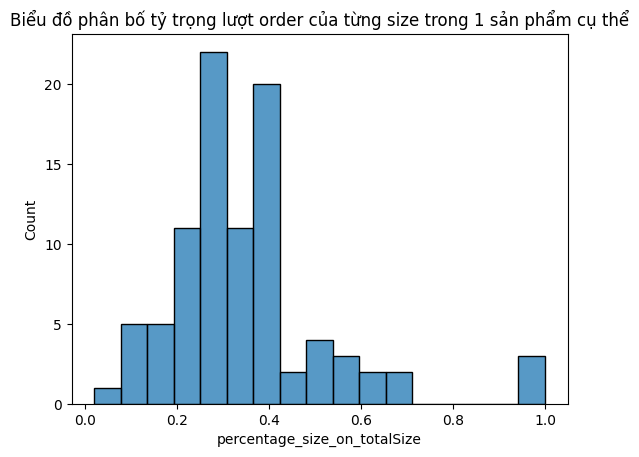

In [18]:
# plot histplot
sns.histplot(data=product_size, x="percentage_size_on_totalSize").set_title('Biểu đồ phân bố tỷ trọng lượt order của từng size trong 1 sản phẩm cụ thể')

####**NHẬN XÉT**
Tỷ trọng lượt order giữa các size trong 1 sản phẩm pizza đang có sự chênh lệch.
- Sản phẩm chỉ có 1 size được order: The Five Cheese Pizza | L | 1.00
- Sản phẩm có tỷ lệ lượt order giữa các size không đồng đều: The Calabrese Pizza | S M L | 0.11 0.60 0.30
- Sản phẩm có tỷ lệ lượt order giữa các size đồng đều: The Vegetables + Vegetables Pizza | S M L | 0.30 0.42 0.28

####**SUGGEST**
- Chọn ra 1 vài sản phẩm để tìm nguyên nhân tại sao lượt order giữa các size giữa các sản phẩm là khác nhau.
<br>Nếu đây không phải do business chủ động thực hiện thì việc tìm ra nguyên nhân có thể giúp nhà hàng tối ưu menu để upsize khách hàng trong tương lai.

## PHẦN 2.2 | point of view: TIME
(Dưới đây là một số câu hỏi chúng ta có thể phân tích)
<br> **I. PHÂN TÍCH DOANH SỐ THEO GIỜ TRONG NGÀY**
<br> 1.1. Tìm khung giờ có doanh số cao trong ngày
<br> 1.2. Các khung giờ doanh số cao trong ngày (xét theo thứ trong tuần) có khác nhau không?
<br> 1.3. Các khung giờ doanh số cao trong ngày (xét từng tháng) có khác nhau không?


<br> **II. PHÂN TÍCH DOANH SỐ THEO THỨ TRONG TUẦN**
<br> 2.1. Tìm các thứ có doanh số cao trong tuần

<br> **III. MỤC TIÊU**
<br> 3.1. Tìm ra khung giờ/thứ doanh số cao để có chiến lược nhân sự, sản phẩm, tiếp thị tận dụng lượng khách đông đảo.
<br> 3.2. Tìm ra khung giờ/thứ doanh số thấp để có chiến lược nhân sự, sản phẩm, tiếp thị phù hợp.

###**I. PHÂN TÍCH DOANH SỐ THEO GIỜ TRONG NGÀY**

####**1.1. Tìm khung giờ có doanh số cao trong ngày (scope of time: all)**

Text(0.5, 1.0, 'Doanh số theo giờ | Scope of time: all')

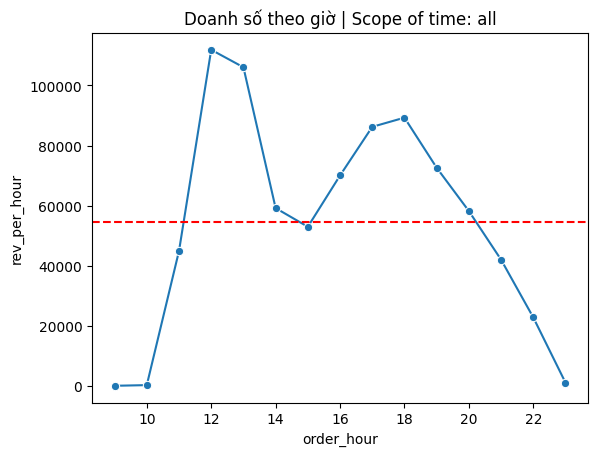

In [19]:
# Plot line chart
res_trans['order_hour'] = pd.to_datetime(res_trans['order_time'], format='%H:%M:%S').dt.hour
peak_hour_rev = res_trans.groupby(['order_hour'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_hour', 'rev_per_hour']
sns.lineplot(data=peak_hour_rev, x="order_hour", y="rev_per_hour", marker='o')
# Plot mean line
mean_rev = peak_hour_rev['rev_per_hour'].mean()
plt.axhline(mean_rev, color='red', linestyle='--', label='Mean Revenue')
plt.title("Doanh số theo giờ | Scope of time: all")

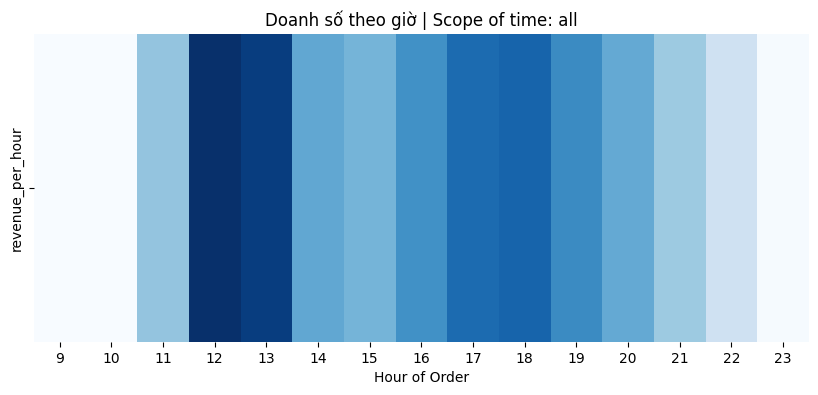

In [20]:
# plot heatmap
df = peak_hour_rev.copy()
df.columns = ['order_hour', 'revenue_per_hour']
df.set_index('order_hour', inplace=True)
# Transpose the DataFrame
df_transposed = df.T
# Plot heatmap vertically with a single-color colormap
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
heatmap=sns.heatmap(df_transposed, cmap='Blues', annot=False, fmt='.1f', cbar=False)
plt.xlabel('Hour of Order')
plt.title("Doanh số theo giờ | Scope of time: all")
plt.show()

####**1.2. Các khung giờ doanh số cao trong ngày (xét theo thứ trong tuần) có khác nhau không? (scope of time: thứ trong tuần)**

Text(0.5, 1.0, 'Doanh số theo giờ | Scope of time: Thứ trong tuần')

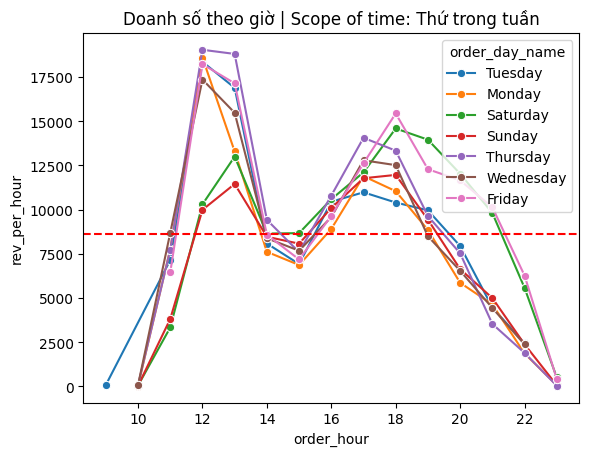

In [21]:
# plot line chart
res_trans['order_hour'] = pd.to_datetime(res_trans['order_time'], format='%H:%M:%S').dt.hour
res_trans['order_day_name'] = res_trans['order_date'].dt.day_name()
peak_hour_rev = res_trans.groupby(['order_hour', 'order_day_name'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_hour', 'order_day_name', 'rev_per_hour']
sns.lineplot(data=peak_hour_rev, x="order_hour", y="rev_per_hour", marker='o', hue='order_day_name')
# Plot mean line
mean_rev = peak_hour_rev['rev_per_hour'].mean()
plt.axhline(mean_rev, color='red', linestyle='--', label='Mean Revenue')
plt.title("Doanh số theo giờ | Scope of time: Thứ trong tuần")

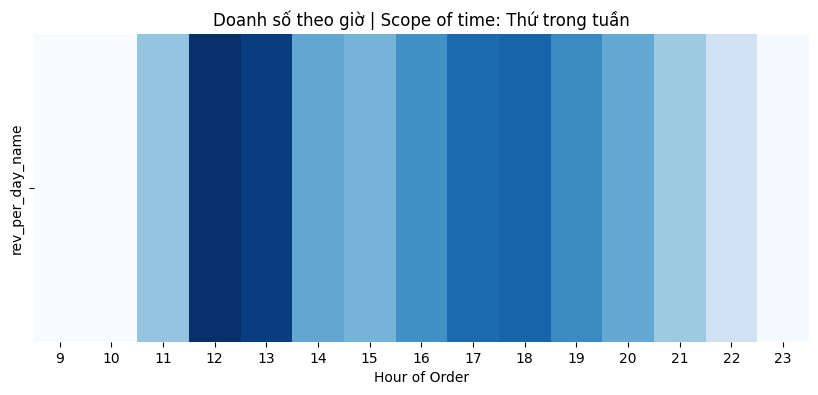

In [22]:
# plot heatmap
res_trans['order_hour'] = pd.to_datetime(res_trans['order_time'], format='%H:%M:%S').dt.hour
peak_hour_rev = res_trans.groupby(['order_hour'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_hour', 'rev_per_day_name']
peak_hour_rev = peak_hour_rev.sort_values(by=['order_hour']).reset_index(drop=True)

df = peak_hour_rev.copy()
# Set the order_hour column as the index
df.set_index('order_hour', inplace=True)

# Transpose the DataFrame
df_transposed = df.T

# Plot heatmap vertically with a single-color colormap
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.heatmap(df_transposed, cmap='Blues', annot=False, fmt='.1f', cbar=False)
plt.xlabel('Hour of Order')
plt.title("Doanh số theo giờ | Scope of time: Thứ trong tuần")
plt.show()

####**1.3. Các khung giờ doanh số cao trong ngày (xét từng tháng) có khác nhau không? (scope of time: month)**

Text(0.5, 1.0, 'Doanh số theo giờ | Scope of time: Month')

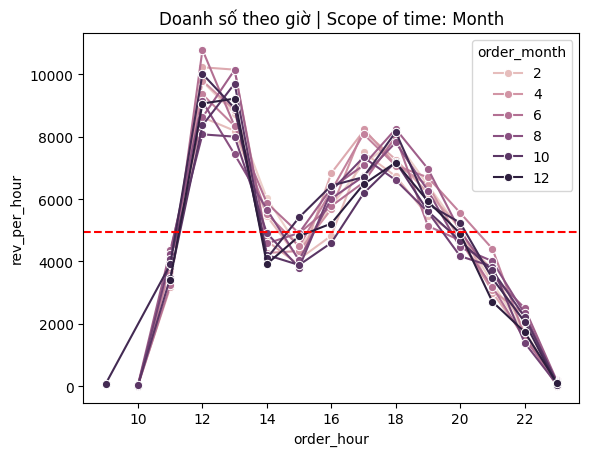

In [23]:
# Plot line chart
res_trans['order_hour'] = pd.to_datetime(res_trans['order_time'], format='%H:%M:%S').dt.hour
res_trans['order_month'] = pd.to_datetime(res_trans['order_date']).dt.month
peak_hour_rev = res_trans.groupby(['order_hour', 'order_month'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_hour', 'order_month', 'rev_per_hour']
sns.lineplot(data=peak_hour_rev, x="order_hour", y="rev_per_hour", marker='o', hue='order_month')
# Plot mean line
mean_rev = peak_hour_rev['rev_per_hour'].mean()
plt.axhline(mean_rev, color='red', linestyle='--', label='Mean Revenue')
plt.title("Doanh số theo giờ | Scope of time: Month")

Text(0.5, 1.0, 'Doanh số theo giờ | Scope of time: Month')

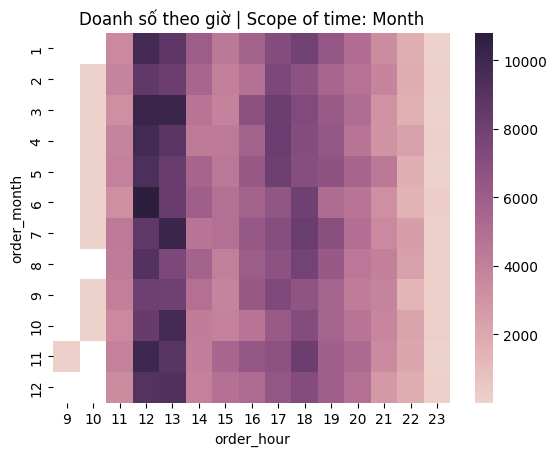

In [24]:
# Plot heatmap
df = peak_hour_rev.pivot(index='order_month', columns='order_hour', values='rev_per_hour')
sns.heatmap(df, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Doanh số theo giờ | Scope of time: Month")

####**NHẬN XÉT**
**1. Khung giờ cao điểm**
    <br>- Trưa: 11h30 - 13h30
    <br>- Chiều: 16h30 - 18h30
<br> **2. Khung giờ thấp điểm**
    <br>- Sáng: 9h-10h30
    <br>- Trưa: 14h-15h
    <br>- Khuya: 22h trở đi
<br> Ta cứ tưởng khung giờ thấp điểm là tầm 14h-16h, nhưng thực tế doanh số khung giờ này vẫn đạt mức trung bình.
<br>Vì vậy, chúng ta có thể tập trung vào khung giờ sáng sớm (trước 10h) và tối muộn (sau 20h) để tăng doanh số.

**SUGGESTION**
    <br>- Cân nhắc việc thêm dòng sản phẩm dành cho khung giờ **sáng sớm** (9h-10h30): pizza-mini ăn sáng.
    <br>- Cân nhắc chạy ưu đãi dành riêng cho khung giờ **tối muộn** (20h-23h): pizza-chill (vd: mua pizza tặng Strongbow)

###**II. PHÂN TÍCH DOANH SỐ THEO THỨ TRONG TUẦN**

####**2.1. Tìm các thứ có doanh số cao trong tuần (scope of time: all)**

Text(0.5, 1.0, 'Doanh số theo thứ trong tuần | Scope of time: all')

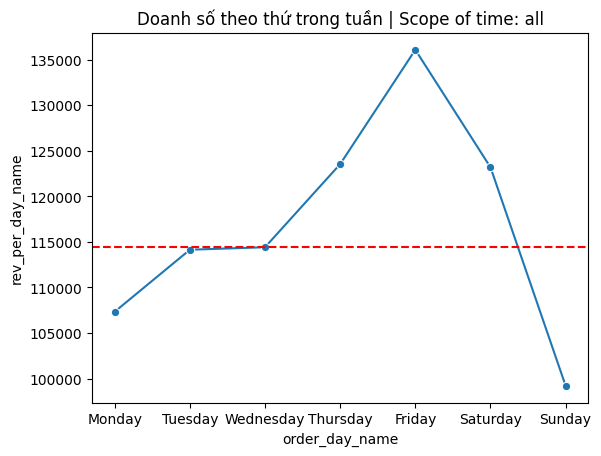

In [25]:
# Giả thuyết: Tôi đoán doanh số cao sẽ rơi vào 2 ngày cuối tuần (thứ 7, chủ nhật)
# plot line chart
res_trans['order_day_name'] = res_trans['order_date'].dt.day_name()
peak_hour_rev = res_trans.groupby(['order_day_name'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_day_name', 'rev_per_day_name']
dic = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
peak_hour_rev['for_sorting'] = peak_hour_rev['order_day_name'].replace(dic)
peak_hour_rev.sort_values(by=['for_sorting'], inplace=True)
sns.lineplot(data=peak_hour_rev, x="order_day_name", y="rev_per_day_name", marker='o')
# Plot mean line
mean_rev = peak_hour_rev['rev_per_day_name'].median()
plt.axhline(mean_rev, color='red', linestyle='--', label='Mean Revenue')
plt.title("Doanh số theo thứ trong tuần | Scope of time: all")

**Giả thuyết**: Tôi đoán doanh số cao sẽ rơi vào 2 ngày cuối tuần (thứ 7, chủ nhật). Tuy nhiên thực tế lại khác:
<br>1. Peak revenue nằm ở thứ 6 thay vì thứ 7.
<br>2. Chủ nhật có doanh số thấp nhất, thậm chí thấp hơn thứ 2.
<br>Vậy,
<br>**Tại sao doanh số thứ 6 đạt đỉnh?
<br>Tại sao doanh số chủ nhật thấp nhất tuần?**

Tôi sẽ tìm hiểu tại sao doanh số lại biểu hiện như vậy với hy vọng có thể tìm ra pattern (vào ngày doanh số cao điểm, thấp điểm) để xem có thể áp dụng các đặc điểm đó ra những ngày khác không?
<br>(Áp dụng đặc điểm của peak day (ngày thứ 6) cho các ngày doanh số thấp (chủ nhật).
Cố gắng loại bỏ các đặc điểm được  cho là khiến doanh số thấp ở các ngày doanh số thấp (nếu đặc điểm này có tồn tại vào ngày đó).

Nhưng vì tôi chưa có bất kỳ giả thuyết nào cho câu hỏi về doanh số ngày thứ 6, chủ nhật nên trước mắt; tôi sẽ kiểm tra doanh số theo khung giờ của từng thứ trong tuần để xem chi tiết sự khác nhau đó. Tôi nghĩ tôi có thể get được gì đó.

Text(0.5, 1.0, 'Doanh số theo giờ | Scope of time: Thứ trong tuần')

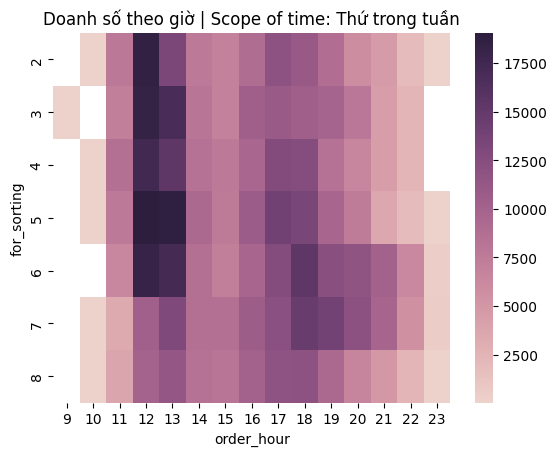

In [26]:
# plot heatmap
res_trans['order_hour'] = pd.to_datetime(res_trans['order_time'], format='%H:%M:%S').dt.hour
res_trans['order_day_name'] = res_trans['order_date'].dt.day_name()
peak_hour_rev = res_trans.groupby(['order_day_name', 'order_hour'])['total_price'].sum().reset_index()
peak_hour_rev.columns = ['order_day_name', 'order_hour', 'rev_per_day_name']
dic = {
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7,
    'Sunday': 8
}
peak_hour_rev['for_sorting'] = peak_hour_rev['order_day_name'].replace(dic)
peak_hour_rev = peak_hour_rev.sort_values(by=['for_sorting']).reset_index(drop=True)
df = peak_hour_rev.pivot(index='for_sorting', columns='order_hour', values='rev_per_day_name')
sns.heatmap(df, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Doanh số theo giờ | Scope of time: Thứ trong tuần")

####**NHẬN XÉT**
<br> **I. Nhận xét về peak hour của các thứ trong tuần**
<br> - **THỨ 3**
<br> + Từ 8h30 sáng đã có doanh số.
<br> + Buổi tối kết thúc sớm, từ 22h30 không phát sinh thêm doanh số.
<br> - **THỨ 4**
<br> + Buổi tối kết thúc sớm, từ 22h30 không phát sinh thêm doanh số.
<br> - **THỨ 5**
<br> + Doanh số giờ cao điểm ăn tối cao hơn so với các ngày còn lại.
<br> - **THỨ 6**
<br> + Doanh số giờ cao điểm ăn tối cao hơn so với các ngày còn lại.
<br> + Buổi tối kết thúc muộn hơn so với các ngày còn lại.
<br> - **THỨ 7**
<br> + Doanh số giờ ăn tối cao hơn so với các ngày còn lại.
<br> + Buổi tối kết thúc muộn hơn so với các ngày còn lại.
<br> + Doanh số giờ ăn trưa thấp hơn so với ngày trong tuần.
<br> - **CHỦ NHẬT**
<br> + Doanh số giờ cao điểm ăn tối cao hơn so với các ngày còn lại.
<br> + Buổi tối kết thúc muộn hơn so với các ngày còn lại.
<br> + Doanh số giờ ăn trưa thấp hơn so với ngày trong tuần.

<br>**II. Tại sao thứ 6 doanh số cao nhất, chủ nhật doanh số thấp nhất**
<br> **1. Thứ 6 doanh số cao do**
    <br>Doanh số buổi trưa cao như các thứ cao điểm khác trong tuần. Trong khi:
    <br>- Doanh số khung giờ buổi tối cao hơn khung giờ buổi tối của các ngày còn lại.
    <br>- Doanh số kéo dài đến (23h) -> Thời gian kinh doanh buổi tối kéo dài hơn.
<br> **2. Chủ nhật doanh số thấp do**
    <br>- Doanh số vào giờ ăn trưa thấp hơn so với ngày trong tuần trong khi doanh số các buổi còn lại chỉ ngang các ngày thấp điểm trong tuần (ngang thứ 2).

####**SUGGEST**
Công ty có thể đưa ra các chương trình khuyến mãi, kế hoạch nhân sự cửa hàng dựa theo tình trạng doanh số theo ngày giờ.
- Thứ 3: Có thể triển khai deal cho khung giờ sáng sớm (vì đây là thứ có phát sinh doanh số từ 8h30 sáng)
- Thứ 6: Có thể triển khai nhân sự mỏng hơn các ngày khác cho khung giờ sáng sớm (vì thứ 6 doanh số phát sinh từ 10h30 sáng)
- Sắp xếp nhân sự nhiều hơn vào sáng thứ 2, thứ 3, thứ 4, thứ 5, thứ 6.
<br>(vì: Ngày mà buổi sáng cửa hàng rất bận rộn: thứ 2, thứ 3, thứ 4, thứ 5, thứ 6)
- Sắp xếp nhân sự nhiều hơn vào tối thứ 6, tối thứ 7.
<br>(vì: Ngày mà buổi tối cửa hàng rất bận rộn: thứ 6, thứ 7)



#PHẦN 3: KHUYẾN NGHỊ

**1. Chọn sản phẩm chủ lực để tập trung, cân nhắc đối với những sản phẩm doanh số thấp**
<br>Dựa trên danh sách các sản phẩm đóng góp 80% doanh số.
- Cân nhắc chọn ra 4 sản phẩm pizza chủ lực, đây sẽ là nhóm sản phẩm signature của nhà hàng, thu hút khách hàng và tạo doanh số chính cho nhà hàng.

<br>Dựa trên danh sách các sản phẩm đóng góp 20% doanh số.
- Cân nhắc cắt giảm từ từ các sản phẩm doanh số kém để tối ưu vận hành bếp, chuỗi cung ứng (có thể bắt đầu cắt giảm trước 10% ~ tương đương 4 sản phẩm).

**2. Về việc R&D sản phẩm mới**
- Phát triển sản phẩm mới có chứa thành phần nguyên liệu với (ingredients_score>0): Mozzarella Cheese (0.67), Pepperoni(0.5), Green Olives(0.5),...
- Phát triển sản phẩm mới cố gắng tránh các nguyên liệu với (ingredients_score<0): Artichokes (-0.6), Kalamata Olives (-0.33), Asiago Cheese (-0.33),...

**3. Chiến lược chọn size cho sản phẩm**
<br>Dựa trên danh sách kết hợp: [Sản phẩm] - [Size] để điều chỉnh chiến lược giá.
<br>Ví dụ
- Nếu muốn tăng số lượng bán -> có thể áp dụng khuyến mãi mua 1 tặng 1 cho size được order nhiều.
- Nếu muốn tăng doanh số -> có thể điều chỉnh giá tăng cho size được order nhiều.

**4. Các khung giờ có thể cân nhắc tìm cách tăng doanh số**
- Cân nhắc thêm dòng sản phẩm dành cho khung giờ sáng sớm (9h-10h30): pizza-mini ăn sáng.
- Cân nhắc chạy ưu đãi dành riêng cho khung giờ tối muộn (20h-23h): pizza-chill (vd: mua pizza tặng Strongbow)

**5. Sắp xếp nhân sự dựa trên doanh số vào các giờ, thứ cụ thể**
<br>Công ty có thể đưa ra các chương trình khuyến mãi, kế hoạch nhân sự cửa hàng dựa theo tình hình doanh số.

- Thứ 3: Có thể triển khai deal cho khung giờ sáng sớm (vì đây là thứ có phát sinh doanh số từ 8h30 sáng)
- Thứ 6: Có thể triển khai nhân sự mỏng hơn các ngày khác cho khung giờ sáng sớm (vì thứ 6 doanh số phát sinh từ 10h30 sáng)
- Sắp xếp nhân sự nhiều hơn vào các buổi sáng thứ 2, thứ 3, thứ 4, thứ 5, thứ 6.
(vì: Cửa hàng rất bận rộn vào buổi sáng các thứ: thứ 2, thứ 3, thứ 4, thứ 5, thứ 6)
- Sắp xếp nhân sự nhiều hơn vào các buổi tối thứ 6, tối thứ 7.
(vì: Cửa hàng rất bận rộn vào buổi tối các thứ: thứ 6, thứ 7)